In [146]:
import numpy as np
from matplotlib import path
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [147]:
np.seterr("raise")


def calcular_IJ(XC, YC, XB, YB, phi, S):
    num_pan = len(XC)
    I = np.zeros([num_pan, num_pan])
    J = np.zeros([num_pan, num_pan])

    for i in range(num_pan):
        for j in range(num_pan):
            if j != i:
                A = -(XC[i] - XB[j]) * np.cos(phi[j]) - (
                    YC[i] - YB[j]
                ) * np.sin(phi[j])
                B = (XC[i] - XB[j]) ** 2 + (YC[i] - YB[j]) ** 2
                Cn = np.sin(phi[i] - phi[j])
                Dn = -(XC[i] - XB[j]) * np.sin(phi[i]) + (
                    YC[i] - YB[j]
                ) * np.cos(phi[i])
                Ct = -np.cos(phi[i] - phi[j])
                Dt = (XC[i] - XB[j]) * np.cos(phi[i]) + (
                    YC[i] - YB[j]
                ) * np.sin(phi[i])
                E = np.sqrt(B - A**2)
                if E == 0 or np.iscomplex(E) or np.isnan(E) or np.isinf(E):
                    I[i, j] = 0
                    J[i, j] = 0
                else:
                    term1 = (
                        0.5 * Cn * np.log((S[j] ** 2 + 2 * A * S[j] + B) / B)
                    )
                    term2 = ((Dn - A * Cn) / E) * (
                        np.arctan2((S[j] + A), E) - np.arctan2(A, E)
                    )
                    I[i, j] = term1 + term2
                    term1 = (
                        0.5 * Ct * np.log((S[j] ** 2 + 2 * A * S[j] + B) / B)
                    )
                    term2 = ((Dt - A * Ct) / E) * (
                        np.arctan2((S[j] + A), E) - np.arctan2(A, E)
                    )
                    J[i, j] = term1 + term2
            if np.iscomplex(I[i, j]) or np.isnan(I[i, j]) or np.isinf(I[i, j]):
                I[i, j] = 0
            if np.iscomplex(J[i, j]) or np.isnan(J[i, j]) or np.isinf(J[i, j]):
                J[i, j] = 0
    return I, J


def calcular_streamline(XP, YP, XB, YB, phi, S):
    num_pan = len(XB) - 1
    Mx = np.zeros(num_pan)
    My = np.zeros(num_pan)

    for j in range(num_pan):
        A = -(XP - XB[j]) * np.cos(phi[j]) - (YP - YB[j]) * np.sin(phi[j])
        B = (XP - XB[j]) ** 2 + (YP - YB[j]) ** 2
        Cx = -np.cos(phi[j])
        Dx = XP - XB[j]
        Cy = -np.sin(phi[j])
        Dy = YP - YB[j]
        E = np.sqrt(B - A**2)
        if E == 0 or np.iscomplex(E) or np.isnan(E) or np.isinf(E):
            Mx[j] = 0
            My[j] = 0
        else:
            term1 = 0.5 * Cx * np.log((S[j] ** 2 + 2 * A * S[j] + B) / B)
            term2 = ((Dx - A * Cx) / E) * (
                np.arctan2((S[j] + A), E) - np.arctan2(A, E)
            )
            Mx[j] = term1 + term2
            term1 = 0.5 * Cy * np.log((S[j] ** 2 + 2 * A * S[j] + B) / B)
            term2 = ((Dy - A * Cy) / E) * (
                np.arctan2((S[j] + A), E) - np.arctan2(A, E)
            )
            My[j] = term1 + term2

        if np.iscomplex(Mx[j]) or np.isnan(Mx[j]) or np.isinf(Mx[j]):
            Mx[j] = 0
        if np.iscomplex(My[j]) or np.isnan(My[j]) or np.isinf(My[j]):
            My[j] = 0

    return Mx, My

In [200]:
Vinf = 1
num_front = 9  # Numero de fronteras o vórtices

alpha_grad = 0
alpha_rad = alpha_grad * (np.pi / 180)

tO = (360 / (num_front - 1)) / 2

theta = np.linspace(0, 360, num_front)
theta = theta + tO
theta = theta * (np.pi / 180)


XB = np.cos(theta)
YB = np.sin(theta)

num_pan = len(XB) - 1

borde = np.zeros(num_pan)

edge = (XB[1:] - XB[:-1]) * (YB[1:] + YB[:-1])

sum_edge = np.sum(edge)

if sum_edge < 0:
    XB = np.flipud(XB)
    YB = np.flipud(YB)

XC = np.zeros(num_pan)
YC = np.zeros(num_pan)
S = np.zeros(num_pan)
phi = np.zeros(num_pan)

XC = 0.5 * (XB[:-1] + XB[1:])
YC = 0.5 * (YB[:-1] + YB[1:])
dx = XB[1:] - XB[:-1]
dy = YB[1:] - YB[:-1]
S = np.sqrt(dx**2 + dy**2)
phi = np.arctan2(dy, dx)
phi = np.where(phi < 0, phi + 2 * np.pi, phi)

phi = np.arctan2(dy, dx)

phi = np.where(phi < 0, phi + 2 * np.pi, phi)

delta = phi + (np.pi / 2)
beta = delta - alpha_rad
beta[beta > 2 * np.pi] = beta[beta > 2 * np.pi] - 2 * np.pi

In [201]:
I, J = calcular_IJ(XC, YC, XB, YB, phi, S)

A = I + np.pi * np.eye(num_pan, num_pan)
b = -Vinf * 2 * np.pi * np.cos(beta)

lam = np.linalg.solve(A, b)
print("Sum of Lambda: ", round(sum(lam * S), 3))

Sum of Lambda:  0.0


In [202]:
Vt = np.zeros(num_pan)
Cp = np.zeros(num_pan)
for i in range(num_pan):
    addVal = 0
    for j in range(num_pan):
        addVal = addVal + (lam[j] / (2 * np.pi)) * J[i, j]

    Vt[i] = Vinf * np.sin(beta[i]) + addVal
    Cp[i] = 1 - (Vt[i] / Vinf) ** 2

    analyticTheta = np.linspace(0,2*np.pi,200)
analyticCP    = 1 - 4*np.sin(analyticTheta)**2

CN = -Cp*S*np.sin(beta)
CA = -Cp*S*np.cos(beta)

# Compute lift and drag coefficients
CL = sum(CN*np.cos(alpha_rad)) - sum(CA*np.sin(alpha_rad))
CD = sum(CN*np.sin(alpha_rad)) + sum(CA*np.cos(alpha_rad))

print("CL      : ",round(CL, 3))
print("CD      : ",round(CD, 3))

CL      :  -0.0
CD      :  0.0


# Streamlines

In [203]:
nGridX = 100
nGridY = 100
xVals = [-1.5, 1.5]
yVals = [-1.5, 1.5]

slPct = 30
Ysl = np.linspace(yVals[0], yVals[1], int((slPct / 100) * nGridY))
Xsl = xVals[0] * np.ones(len(Ysl))
XYsl = np.vstack((Xsl.T, Ysl.T)).T

Xgrid = np.linspace(xVals[0], xVals[1], nGridX)
Ygrid = np.linspace(yVals[0], yVals[1], nGridY)
XX, YY = np.meshgrid(Xgrid, Ygrid)

Vx = np.zeros([nGridX, nGridY])
Vy = np.zeros([nGridX, nGridY])

AF = np.vstack((XB.T, YB.T)).T
afPath = path.Path(AF)

for m in range(nGridX):
    for n in range(nGridY):
        XP = XX[m, n]
        YP = YY[m, n]
        Mx, My = calcular_streamline(XP, YP, XB, YB, phi, S)
        if afPath.contains_points([(XP, YP)]):
            Vx[m, n] = 0
            Vy[m, n] = 0
        else:
            Vx[m, n] = Vinf * np.cos(alpha_rad) + sum(lam * Mx / (2 * np.pi))
            Vy[m, n] = Vinf * np.sin(alpha_rad) + sum(lam * My / (2 * np.pi))

Vxy = np.sqrt(Vx**2 + Vy**2)
CpXY = 1 - (Vxy / Vinf)**2


# Gráficas

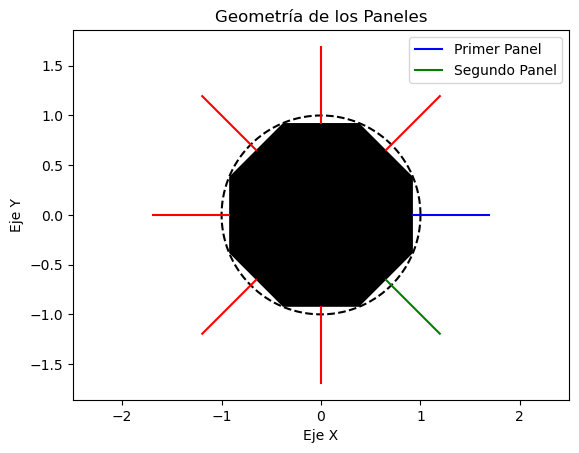

In [204]:
angCirc = np.linspace(0, 2 * np.pi, 1000)
xCirc = np.cos(angCirc)
yCirc = np.sin(angCirc)
fig = plt.figure(1)
plt.cla()
plt.plot(xCirc, yCirc, "k--")
plt.fill(XB, YB, "k")
X = np.zeros(2)
Y = np.zeros(2)
for i in range(num_pan):
    X[0] = XC[i]
    X[1] = XC[i] + S[i] * np.cos(delta[i])
    Y[0] = YC[i]
    Y[1] = YC[i] + S[i] * np.sin(delta[i])
    if i == 0:
        plt.plot(X, Y, "b-", label="Primer Panel")
    elif i == 1:
        plt.plot(X, Y, "g-", label="Segundo Panel")
    else:
        plt.plot(X, Y, "r-")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.title("Geometría de los Paneles")
plt.axis("equal")
plt.legend()
plt.show()

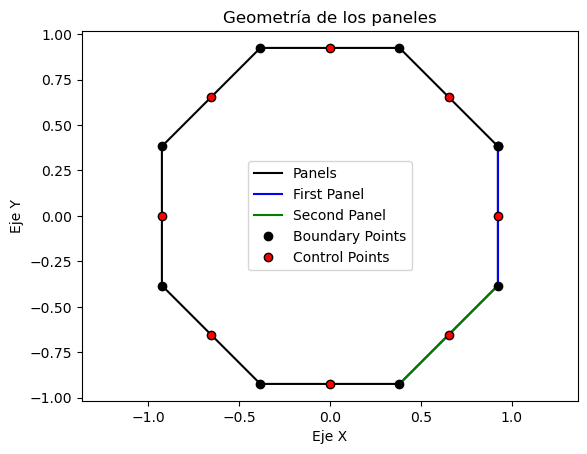

In [205]:
plt.plot(XB, YB, "k-", label="Panels")
plt.plot([XB[0], XB[1]], [YB[0], YB[1]], "b-", label="First Panel")
plt.plot([XB[1], XB[2]], [YB[1], YB[2]], "g-", label="Second Panel")
plt.plot(XB, YB, "ko", markerfacecolor="k", label="Boundary Points")
plt.plot(XC, YC, "ko", markerfacecolor="r", label="Control Points")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.title("Geometría de los paneles")
plt.axis("equal")
plt.legend()
plt.show()

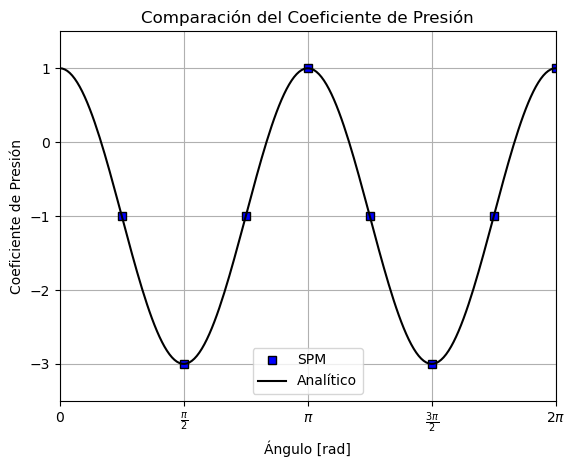

In [206]:
# Graficar el coeficiente de presión del método de paneles
plt.plot(beta, Cp, "ks", markerfacecolor="blue", label="SPM")
# Graficar el coeficiente de presión analítico
plt.plot(analyticTheta, analyticCP, "k", label="Analítico")

# Etiquetas y título
plt.xlabel("Ángulo [rad]")
plt.ylabel("Coeficiente de Presión")
plt.title("Comparación del Coeficiente de Presión")

# Límites de los ejes
plt.xlim(0, 2 * np.pi)
plt.ylim(-3.5, 1.5)

# Etiquetas personalizadas en el eje x
plt.xticks(
    [0, np.pi / 2, np.pi, 3 * np.pi / 2, 2 * np.pi],
    ["0", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$", r"$2\pi$"],
)

# Mostrar leyenda y cuadrícula
plt.legend()
plt.grid(True)
plt.show()

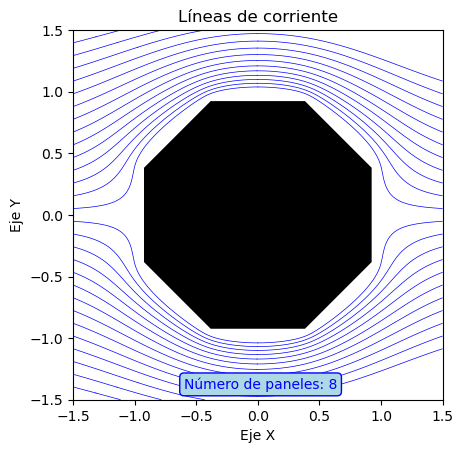

In [207]:
np.seterr(under="ignore")

fig = plt.figure(4)
plt.cla()
plt.streamplot(
    XX,
    YY,
    Vx,
    Vy,
    linewidth=0.5,
    density=10,
    color="b",
    arrowstyle="-",
    start_points=XYsl,
)
plt.fill(XB, YB, "k")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.title("Líneas de corriente")
plt.gca().set_aspect("equal")
plt.xlim(xVals)
plt.ylim(yVals)
plt.annotate(
    f"Número de paneles: {num_pan}",
    xy=(0.3, 0.03),
    xycoords="axes fraction",
    fontsize=10,
    color="blue",
    bbox=dict(
        boxstyle="round,pad=0.3", edgecolor="blue", facecolor="lightblue"
    ),
)

plt.show()

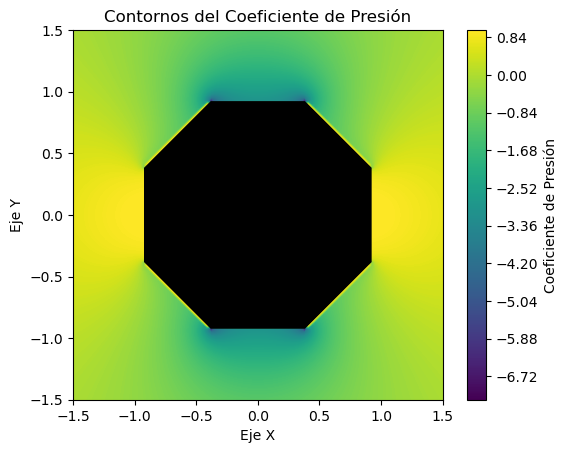

El valor mínimo del coeficiente de presión es: -7.224


In [208]:
min_cp = np.min(CpXY)
norm = mcolors.Normalize(vmin=min_cp, vmax=1)
contour = plt.contourf(XX, YY, CpXY, 500, cmap="viridis", norm=norm)
plt.fill(XB, YB, "k")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.title("Contornos del Coeficiente de Presión")
plt.gca().set_aspect("equal")
plt.xlim(xVals)
plt.ylim(yVals)
cbar = plt.colorbar(contour)
cbar.set_label("Coeficiente de Presión")
plt.show()

print("El valor mínimo del coeficiente de presión es:", round(min_cp, 3))